In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy.stats import skew
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt
plt.style.use("ggplot")
plt.rcParams['figure.figsize'] = (12,8)

In [3]:
advert = pd.read_csv('Advertising.csv')
advert.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [4]:
advert.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
TV           200 non-null float64
radio        200 non-null float64
newspaper    200 non-null float64
sales        200 non-null float64
dtypes: float64(4)
memory usage: 6.4 KB


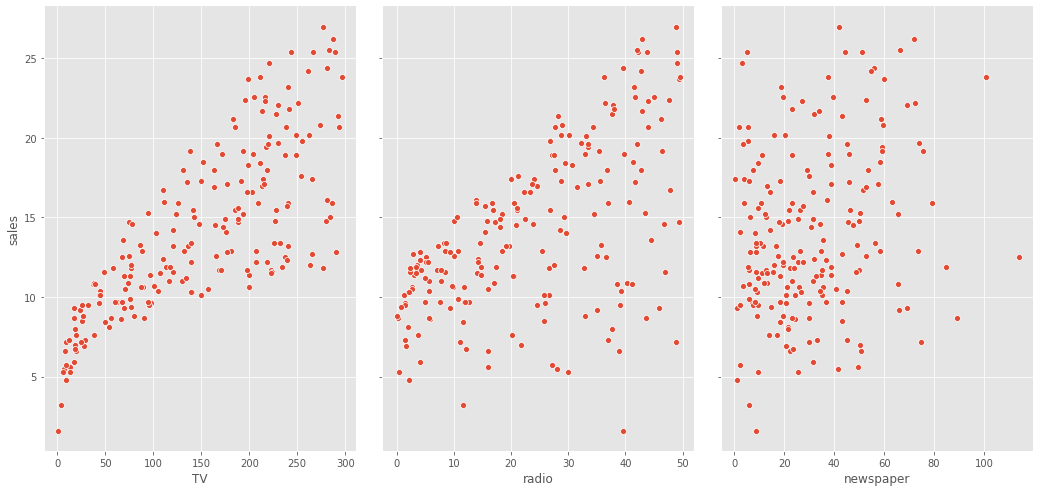

In [5]:
sns.pairplot(advert, x_vars = ['TV', 'radio', 'newspaper'], y_vars = 'sales', height = 7, aspect = 0.7)

In [6]:
from sklearn.linear_model import LinearRegression
X = advert[['TV', 'radio', 'newspaper']]
y = advert.sales

lm1 = LinearRegression()
lm1.fit(X, y)

print(lm1.intercept_)
print(lm1.coef_)

2.9388893694594085
[ 0.04576465  0.18853002 -0.00103749]


In [7]:
list(zip(['TV', 'radio', 'newspaper'], lm1.coef_))

[('TV', 0.0457646454553976),
 ('radio', 0.18853001691820453),
 ('newspaper', -0.00103749304247629)]

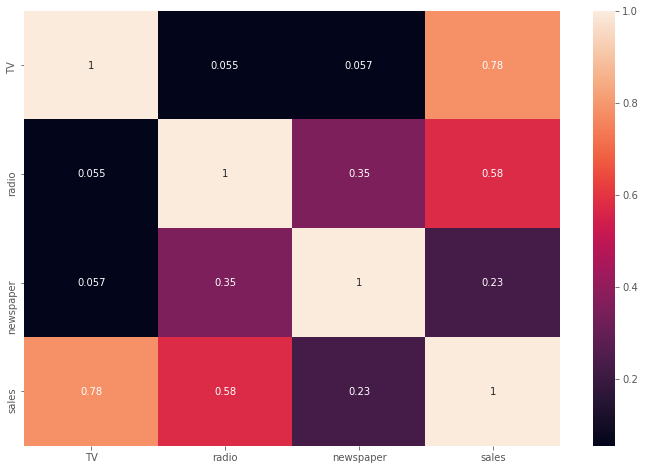

In [10]:
sns.heatmap(advert.corr(), annot = True)

In [11]:
from sklearn.metrics import r2_score

lm2 = LinearRegression().fit(X[['TV', 'radio']], y)
lm2_pred = lm2.predict(X[['TV', 'radio']])

print(r2_score(y, lm2_pred)) #fraction of the variance explained

0.8971942610828957


In [16]:
lm1_pred = lm1.predict(X)
print(r2_score(y, lm1_pred))

0.8972106381789522


In [22]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error 

X = advert[['TV', 'radio', 'newspaper']]
y = advert.sales

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1)

lm4 = LinearRegression().fit(X_train, y_train)
lm4_pred = lm4.predict(X_test)

print("RMSE", np.sqrt(mean_squared_error(y_test, lm4_pred)))
print("R^2", r2_score(y_test, lm4_pred))

RMSE 1.404651423032895
R^2 0.9156213613792232


In [24]:
X = advert[['TV', 'radio']]
y = advert.sales

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1)

lm5 = LinearRegression().fit(X_train, y_train)
lm5_pred = lm5.predict(X_test)

print("RMSE", np.sqrt(mean_squared_error(y_test, lm5_pred)))
print("R^2", r2_score(y_test, lm5_pred))

RMSE 1.3879034699382886
R^2 0.9176214942248908


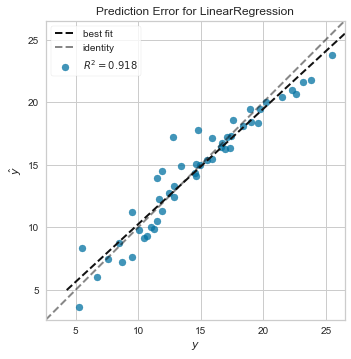

In [27]:
from yellowbrick.regressor import PredictionError, ResidualsPlot
visualizer = PredictionError(lm5).fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.poof()

In [28]:
advert['interaction'] = advert['TV'] * advert['radio']

X = advert[['TV', 'radio', 'interaction']]
y = advert.sales

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1)

lm6 = LinearRegression().fit(X_train, y_train)
lm6_pred = lm6.predict(X_test)

print("RMSE", np.sqrt(mean_squared_error(y_test, lm6_pred)))
print("R^2", r2_score(y_test, lm6_pred))

RMSE 0.7011871137164327
R^2 0.978973681468126


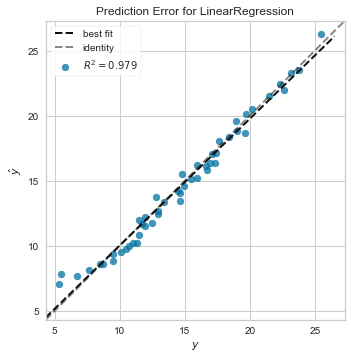

In [29]:
visualizer = PredictionError(lm6).fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.poof()